# Merge ontology demo
In this notebook I make a version of the Allen atlas annotation volume and corresponding csv file where the parents always have lower ids than the children. I then experiment with python API key bindings for using segment equivalences to collapse/expand the atlas in Neuroglancer. 

You will need to make sure to have the file allen.json downloaded. This is available in this git repository under the subfolder data/ from this notebook's location.

## Merge ontology feature
Here we will try to introduce a key that will use the segment properties mapping to collapse a segment you are hovering over to its parent region, along with all children of the same parent.

In [1]:
import neuroglancer

In [11]:
# neuroglancer.set_static_content_source(url='https://nglancer.pni.princeton.edu')
neuroglancer.set_static_content_source(url='http://localhost:8080')
viewer = neuroglancer.Viewer()
with viewer.txn() as s:
    s.layers['Atlas'] = neuroglancer.SegmentationLayer(source='precomputed://http://localhost:1336'
    )
print(viewer)

http://127.0.0.1:45151/v/4f7e18494516a5c6d3c9dede4be4f7df17fb1b0b/


In [7]:
with viewer.txn() as s:
    s.crossSectionScale = 2.

In [127]:
subG = graphviz.Digraph()
edge_list = [(667, 667), (668, 667), (669, 667), (670, 667), (671, 667), (672, 667), (673, 667), (674, 667), (675, 667), (676, 667), (677, 667), (678, 667), (679, 667), (680, 667), (681, 667), (682, 667), (683, 667), (684, 667), (685, 667), (686, 667), (687, 667), (688, 667), (689, 667), (690, 667), (691, 667), (692, 667), (693, 667), (694, 667), (695, 667), (696, 667), (697, 667), (698, 667), (699, 667), (700, 667), (701, 667), (702, 667), (703, 667), (704, 667), (705, 667), (706, 667), (707, 667), (708, 667), (709, 667), (710, 667), (711, 667), (712, 667), (713, 667), (714, 667), (715, 667)]
for edge in edge_list:
    if edge[0] == edge[1]:
        subG.node(str(edge[0]))
    else:
#     print(edge[0],edge[1])
        subG.edge(str(edge[0]),str(edge[1]))

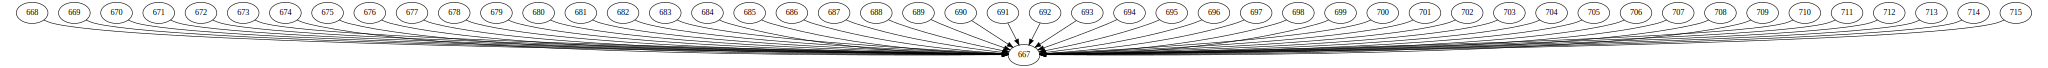

region name: Nucleus of reuniens
parent name: Midline group of the dorsal thalamus
progeny list: ['Paraventricular nucleus of the thalamus', 'Parataenial nucleus', 'Nucleus of reuniens', 'Xiphoid thalamic nucleus']
[(692, 692), (693, 692), (694, 692), (695, 692), (696, 692), (693, 692), (694, 692), (695, 692), (696, 692)]
region name: Nucleus of reuniens
parent name: Midline group of the dorsal thalamus
progeny list: ['Paraventricular nucleus of the thalamus', 'Parataenial nucleus', 'Nucleus of reuniens', 'Xiphoid thalamic nucleus']
[(692, 692), (693, 692), (694, 692), (695, 692), (696, 692), (693, 692), (694, 692), (695, 692), (696, 692)]
region name: Nucleus of reuniens
parent name: Midline group of the dorsal thalamus
progeny list: ['Paraventricular nucleus of the thalamus', 'Parataenial nucleus', 'Nucleus of reuniens', 'Xiphoid thalamic nucleus']
[(692, 692), (693, 692), (694, 692), (695, 692), (696, 692), (693, 692), (694, 692), (695, 692), (696, 692)]


In [128]:
subG

[(695, 695), (692, 695), (693, 695)]
[667]
[(695, 695), (692, 695), (693, 695)]


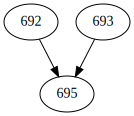

isolating element 692
dict_items([(693, 693), (695, 693)])
isolating element 693
dict_items([])


In [159]:
with viewer.txn() as s:
    s.layers['Allen hierarch labels'].layer.equivalences = [(695,692),(693,692)]
    equiv_map = s.layers['Allen hierarch labels'].layer.equivalences
    edge_list = list(equiv_map.items())
    print(edge_list)
    print(list(equiv_map.members(667)))
    equiv_map.delete_set(667)
    edge_list = list(equiv_map.items())
    print(edge_list)
subG = graphviz.Digraph()
for edge in edge_list:
    if edge[0] == edge[1]:
        subG.node(str(edge[0]))
    else:
        subG.edge(str(edge[0]),str(edge[1]))
subG

In [ ]:
with viewer.txn() as s:
#     s.layers['Allen hierarch labels'].layer.equivalences = [(693, 693), (692, 693), (694, 693), (695, 693), (696, 693)]
    s.layers['Allen hierarch labels'].layer.equivalences = [(693, 693), (692, 693), (694, 693), (695, 693), (696, 693)]
    equiv_map = s.layers['Allen hierarch labels'].layer.equivalences
    edge_list = list(equiv_map.items())
    print(edge_list)
    print(list(equiv_map.members(667)))
    equiv_map.delete_set(667)
    edge_list = list(equiv_map.items())
    print(edge_list)
subG = graphviz.Digraph()
for edge in edge_list:
    if edge[0] == edge[1]:
        subG.node(str(edge[0]))
    else:
        subG.edge(str(edge[0]),str(edge[1]))
subG

In [168]:
def make_subgraph(edge_list):
    subG = graphviz.Digraph()
    for edge in edge_list:
        if edge[0] == edge[1]:
            pass
        else:
            subG.edge(str(edge[0]),str(edge[1]))
    return subG

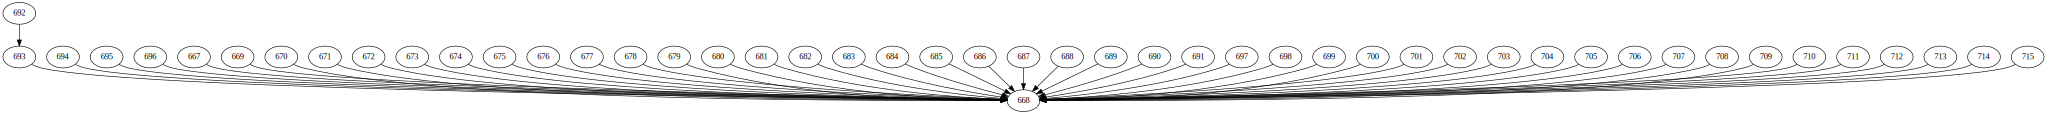

In [169]:
edge_list = [(692, 693), (693, 668), (694, 668), (695, 668), (696, 668), (668, 668), (667, 668), (669, 668), (670, 668), (671, 668), (672, 668), (673, 668), (674, 668), (675, 668), (676, 668), (677, 668), (678, 668), (679, 668), (680, 668), (681, 668), (682, 668), (683, 668), (684, 668), (685, 668), (686, 668), (687, 668), (688, 668), (689, 668), (690, 668), (691, 668), (697, 668), (698, 668), (699, 668), (700, 668), (701, 668), (702, 668), (703, 668), (704, 668), (705, 668), (706, 668), (707, 668), (708, 668), (709, 668), (710, 668), (711, 668), (712, 668), (713, 668), (714, 668), (715, 668)]

G = make_subgraph(edge_list)
G

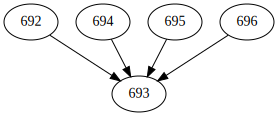

In [170]:
edge_list = [(693, 693), (692, 693), (694, 693), (695, 693), (696, 693)]
G = make_subgraph(edge_list)
G

In [ ]:

prog=get_progeny(data,'root',progeny_list)
prog

In [ ]:
ontology_id_dict[1031]

In [ ]:
ontology_id_dict[1260]

In [ ]:
get_progeny(data,'stria terminalis')

In [ ]:
ontology_name_dict['stria terminalis']

In [ ]:
parent = ontology_id_dict[1031]
while parent != 'Cerebellum':
    parent = get_parent(Gnew,parent)
    print(parent)

In [181]:
def make_graph_current_edges():
    with viewer.txn() as s:
        equiv_map = s.layers['Allen hierarch labels'].layer.equivalences
        edge_list = list(equiv_map.items())
    print(edge_list)
    subG = graphviz.Digraph()
    
    for edge in edge_list:
        if edge[0] == edge[1]:
            pass
        else:
            subG.edge(str(edge[0]),str(edge[1]))
    return subG

[(19, 19), (20, 19), (21, 19), (22, 19), (23, 19), (24, 19)]


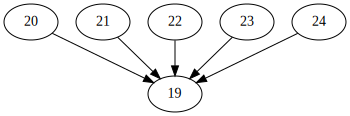

In [190]:
make_graph_current_edges()

[(13, 13), (14, 13), (15, 13), (16, 13), (17, 13), (18, 13), (19, 13), (20, 13), (21, 13), (22, 13), (23, 13), (24, 13), (25, 13), (26, 13), (27, 13), (28, 13), (29, 13), (30, 13)]


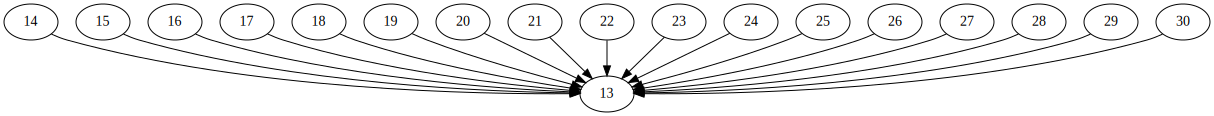

In [192]:
make_graph_current_edges()

In [191]:
1

1

dict_items([(19, 20), (20, 20), (21, 20), (22, 20), (23, 20), (24, 20), (14, 20), (13, 20), (15, 14), (16, 14), (17, 14), (18, 14), (25, 20), (26, 20), (27, 20), (28, 20), (29, 20), (30, 20)])


In [189]:
reset_equivalences()

dict_items([(20, 20), (19, 20), (21, 20), (22, 20), (23, 20), (24, 20)])


[(13, 13), (14, 13), (15, 13), (16, 13), (17, 13), (18, 13), (19, 13), (20, 13), (21, 13), (22, 13), (23, 13), (24, 13), (25, 13), (26, 13), (27, 13), (28, 13), (29, 13), (30, 13)]


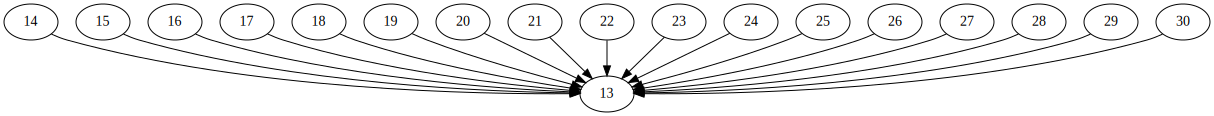

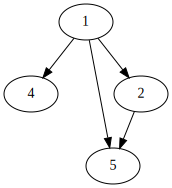

isolating element 13
dict_items([(14, 14), (15, 14), (16, 14), (17, 14), (18, 14), (19, 14), (20, 14), (21, 14), (22, 14), (23, 14), (24, 14), (25, 14), (26, 14), (27, 14), (28, 14), (29, 14), (30, 14)])


In [185]:
edge_list = [(1,4),(1,5),(2,5),(1,2)]
make_subgraph(edge_list)

In [202]:
df_allen

,Unnamed: 0,name,acronym,id,atlas_id,parent_structure_id,parent_name,parent_acronym,voxels_in_structure,fullname,reassigned_id
775,775,"Tuberomammillary nucleus, ventral part",TMv,1,424.0,557.0,Tuberomammillary nucleus,TM,6931,"TMv: Tuberomammillary nucleus, ventral part",776
78,78,"Primary somatosensory area, mouth, layer 6b",SSp-m6b,2,990.0,345.0,"Primary somatosensory area, mouth",SSp-m,7339,"SSp-m6b: Primary somatosensory area, mouth, la...",79
1316,1316,secondary fissure,sec,3,707.0,1040.0,grooves of the cerebellar cortex,grv of CBX,0,sec: secondary fissure,1317
812,812,Inferior colliculus,IC,4,141.0,339.0,"Midbrain, sensory related",MBsen,0,IC: Inferior colliculus,813
1201,1201,internal capsule,int,6,566.0,784.0,corticospinal tract,cst,134366,int: internal capsule,1202
...,...,...,...,...,...,...,...,...,...,...,...
875,875,"Interpeduncular nucleus, intermediate",IPI,607344850,NaN,100.0,NaN,NaN,0,"IPI: Interpeduncular nucleus, intermediate",876
876,876,"Interpeduncular nucleus, dorsomedial",IPDM,607344854,NaN,100.0,NaN,NaN,0,"IPDM: Interpeduncular nucleus, dorsomedial",877
877,877,"Interpeduncular nucleus, dorsolateral",IPDL,607344858,NaN,100.0,NaN,NaN,0,"IPDL: Interpeduncular nucleus, dorsolateral",878
878,878,"Interpeduncular nucleus, rostrolateral",IPRL,607344862,NaN,100.0,NaN,NaN,0,"IPRL: Interpeduncular nucleus, rostrolateral",879


In [204]:
df_cols = df_allen.columns.tolist()
df_cols

['Unnamed: 0',
 'name',
 'acronym',
 'id',
 'atlas_id',
 'parent_structure_id',
 'parent_name',
 'parent_acronym',
 'voxels_in_structure',
 'fullname',
 'reassigned_id']

In [207]:
newcols = ['name','acronym','id','reassigned_id','parent_structure_id','parent_name','parent_acronym','fullname']
output_df=df_allen[newcols]
output_df

,name,acronym,id,reassigned_id,parent_structure_id,parent_name,parent_acronym,fullname
775,"Tuberomammillary nucleus, ventral part",TMv,1,776,557.0,Tuberomammillary nucleus,TM,"TMv: Tuberomammillary nucleus, ventral part"
78,"Primary somatosensory area, mouth, layer 6b",SSp-m6b,2,79,345.0,"Primary somatosensory area, mouth",SSp-m,"SSp-m6b: Primary somatosensory area, mouth, la..."
1316,secondary fissure,sec,3,1317,1040.0,grooves of the cerebellar cortex,grv of CBX,sec: secondary fissure
812,Inferior colliculus,IC,4,813,339.0,"Midbrain, sensory related",MBsen,IC: Inferior colliculus
1201,internal capsule,int,6,1202,784.0,corticospinal tract,cst,int: internal capsule
...,...,...,...,...,...,...,...,...
875,"Interpeduncular nucleus, intermediate",IPI,607344850,876,100.0,NaN,NaN,"IPI: Interpeduncular nucleus, intermediate"
876,"Interpeduncular nucleus, dorsomedial",IPDM,607344854,877,100.0,NaN,NaN,"IPDM: Interpeduncular nucleus, dorsomedial"
877,"Interpeduncular nucleus, dorsolateral",IPDL,607344858,878,100.0,NaN,NaN,"IPDL: Interpeduncular nucleus, dorsolateral"
878,"Interpeduncular nucleus, rostrolateral",IPRL,607344862,879,100.0,NaN,NaN,"IPRL: Interpeduncular nucleus, rostrolateral"


In [209]:
output_df_filename = '/home/ahoag/ngdemo/data/allen_atlas/allen_id_table_w_voxel_counts_hierarch_labels.csv'
output_df.to_csv(output_df_filename)

In [210]:
df = pd.read_csv(output_df_filename)
df

,Unnamed: 0,name,acronym,id,reassigned_id,parent_structure_id,parent_name,parent_acronym,fullname
0,775,"Tuberomammillary nucleus, ventral part",TMv,1,776,557.0,Tuberomammillary nucleus,TM,"TMv: Tuberomammillary nucleus, ventral part"
1,78,"Primary somatosensory area, mouth, layer 6b",SSp-m6b,2,79,345.0,"Primary somatosensory area, mouth",SSp-m,"SSp-m6b: Primary somatosensory area, mouth, la..."
2,1316,secondary fissure,sec,3,1317,1040.0,grooves of the cerebellar cortex,grv of CBX,sec: secondary fissure
3,812,Inferior colliculus,IC,4,813,339.0,"Midbrain, sensory related",MBsen,IC: Inferior colliculus
4,1201,internal capsule,int,6,1202,784.0,corticospinal tract,cst,int: internal capsule
...,...,...,...,...,...,...,...,...,...
1322,875,"Interpeduncular nucleus, intermediate",IPI,607344850,876,100.0,NaN,NaN,"IPI: Interpeduncular nucleus, intermediate"
1323,876,"Interpeduncular nucleus, dorsomedial",IPDM,607344854,877,100.0,NaN,NaN,"IPDM: Interpeduncular nucleus, dorsomedial"
1324,877,"Interpeduncular nucleus, dorsolateral",IPDL,607344858,878,100.0,NaN,NaN,"IPDL: Interpeduncular nucleus, dorsolateral"
1325,878,"Interpeduncular nucleus, rostrolateral",IPRL,607344862,879,100.0,NaN,NaN,"IPRL: Interpeduncular nucleus, rostrolateral"
